# Graph Topology - Make Table

In [1]:
import pandas as pd
import pickle
import seaborn as sns

In [2]:
with open('graph_top_stats.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [3]:
df = pd.DataFrame(data).T

In [4]:
df = df[sorted(df.columns)]

# Type conversion on the ints
type_map = {'No Axioms': int, 'No Edges': int, 'No Nodes': int, 'Diameter': int, 'Communities': int}
df = df.astype(type_map) 

df

,Average geodesic,Cluster coefficient,Communities,Degree Correlation,Degree max,Degree mean,Degree min,Diameter,No Axioms,No Edges,No Nodes,Transitivity
l100_interva1,7.512239,0.102644,22,-0.001023,35.0,3.224490,1.0,18,22,1343,833,0.088778
l100_geomtrap,6.047451,0.125238,13,-0.009350,28.0,3.450000,1.0,14,6,828,480,0.101947
l100_fomodel4,7.602418,0.141829,22,-0.064278,38.0,3.424561,1.0,20,24,2440,1425,0.099214
l100_fomodel0,7.438659,0.136726,27,-0.050893,48.0,3.378502,1.0,19,24,2593,1535,0.095549
l100_finseq_1,6.186199,0.121854,8,0.001667,12.0,2.987952,1.0,15,12,248,166,0.116279


## Plot correlation between axioms and communities

In [5]:
# Axiom and community correlation
df['No Axioms'].corr(df['Communities'])

0.8532154435944017

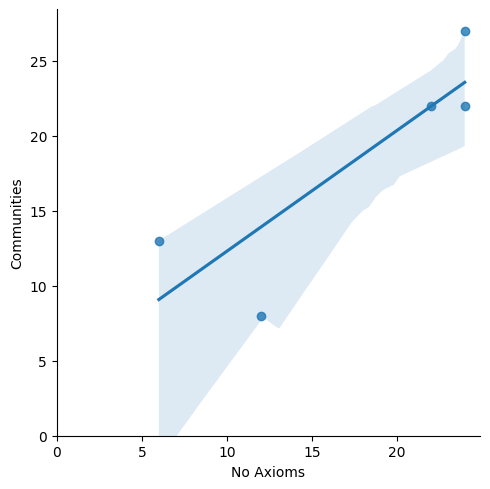

In [6]:
g = sns.lmplot(x="No Axioms", y="Communities", data=df)
#max_label = int(max(max(df["No Axioms"]), max(df['Communities'])))
#ax.set_xticklabels(range(0, max_label + 1))
#ax.set_yticklabels(range(0, max_label + 1))

g.set(ylim=(0, None))
g.set(xlim=(0, None))

# Create stats table

In [7]:
#df_min = df.min().astype(type_map)
#df_max = df.max().astype(type_map)
#df_mean = df.mean()

#df_tab = pd.concat([df.min(), df.max(), df.mean()], axis=1)
df_tab = pd.concat([df.min(), df.max(), df.mean()], axis=1)

df_tab.rename(columns={0: 'Min', 1: 'Max', 2: 'Mean'}, inplace=True)
df_tab.index = df_tab.index.rename('Property')

df_tab = df_tab.round(2)

In [8]:
print(df_tab.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &     Min &      Max &     Mean \\
Property            &         &          &          \\
\midrule
Average geodesic    &    6.05 &     7.60 &     6.96 \\
Cluster coefficient &    0.10 &     0.14 &     0.13 \\
Communities         &    8.00 &    27.00 &    18.40 \\
Degree Correlation  &   -0.06 &     0.00 &    -0.02 \\
Degree max          &   12.00 &    48.00 &    32.20 \\
Degree mean         &    2.99 &     3.45 &     3.29 \\
Degree min          &    1.00 &     1.00 &     1.00 \\
Diameter            &   14.00 &    20.00 &    17.20 \\
No Axioms           &    6.00 &    24.00 &    17.60 \\
No Edges            &  248.00 &  2593.00 &  1490.40 \\
No Nodes            &  166.00 &  1535.00 &   887.80 \\
Transitivity        &    0.09 &     0.12 &     0.10 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_579082/1203108888.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_tab.to_latex())
